In [73]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [9]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

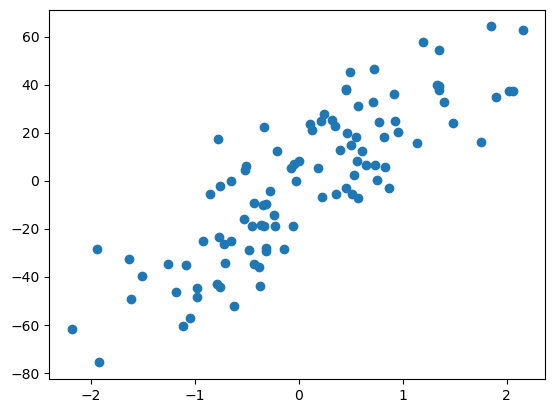

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [11]:
# Lets apply OLS
from sklearn.linear_model import LinearRegression

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [78]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.6345158782661013

In [14]:
np.mean(cross_val_score(reg,X,y,scoring='r2',cv=10))

0.6375011587464419

In [15]:
reg.coef_

array([27.82809103])

In [16]:
reg.intercept_

-2.2947445586769795

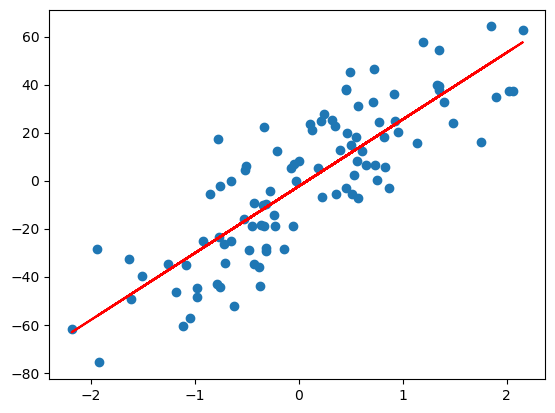

In [17]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [19]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35
# and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 0)

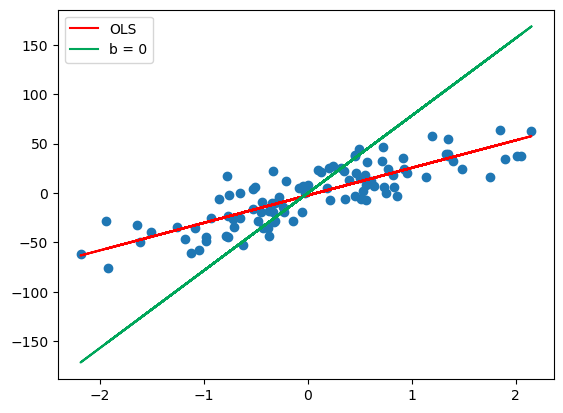

In [20]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [19]:
m = 78.35
b = 0

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-209.27763408209216

In [20]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

-20.927763408209216

In [21]:
# Calculating the new intercept
b = b - step_size
b

20.927763408209216

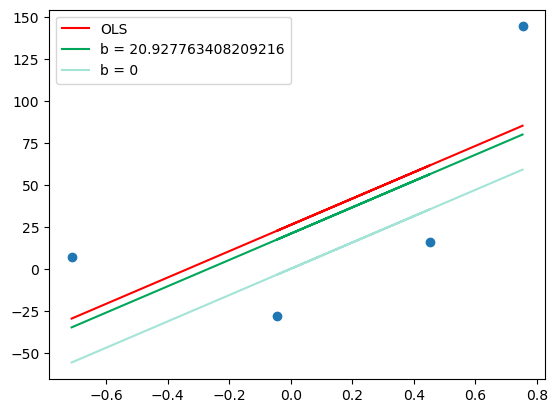

In [22]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [23]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-41.85552681641843

In [24]:
step_size = loss_slope*lr
step_size

-4.185552681641844

In [25]:
b = b - step_size
b

25.11331608985106

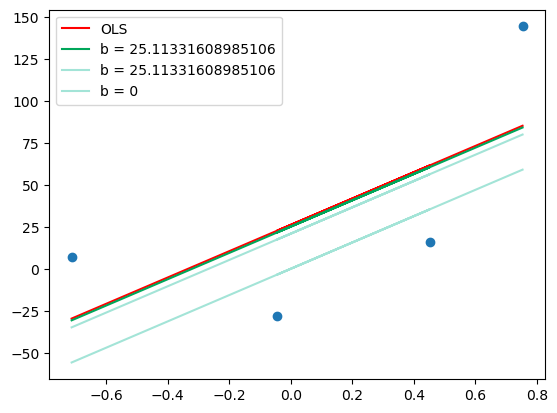

In [26]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [27]:
# Iteration 3
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

-8.371105363283675

In [28]:
step_size = loss_slope*lr
step_size

-0.8371105363283675

In [29]:
b = b - step_size
b

25.95042662617943

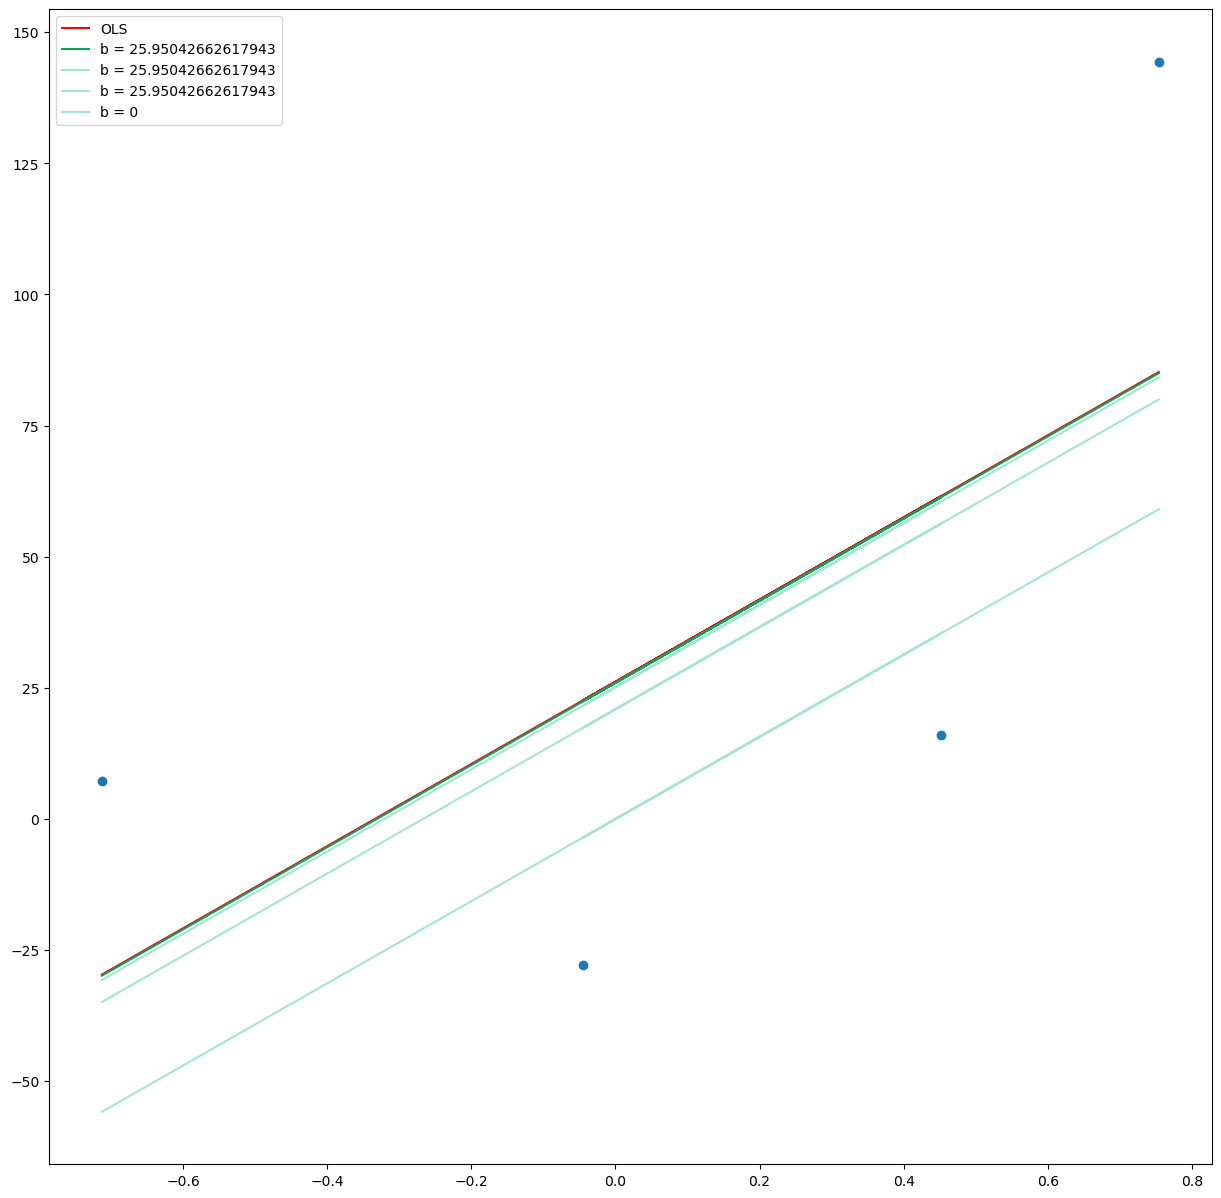

In [30]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

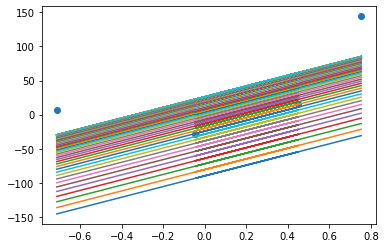

In [94]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

# Making SGCRegressor Class from scratch

In [64]:
class SGDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = 100
        self.learning_rate=learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        for i in range(self.epochs):
            # calculating the slope for both parameter m and b 
            loss_slope_b = -2*np.sum(y_train-self.m*X_train.ravel()-self.b)
            loss_slope_m = -2*np.sum((y_train-self.m*X_train.ravel()-self.b)*X_train.ravel())
            self.b = self.b - (self.learning_rate*loss_slope_b)
            self.m = self.m - (self.learning_rate*loss_slope_m)
        print(self.m, self.b)
        
    def predict(self,X_test):
        return self.m*X_test+self.b

In [65]:
lr = SGDRegressor(0.001,50)

In [66]:
lr.fit(X,y)

27.831130781373727 -2.2945222460781998


In [68]:
model = SGDRegressor(0.001,50)

In [69]:
model.fit(X_train,y_train)

26.948888517492932 -1.6166819278913793


In [70]:
y_pred = model.predict(X_test)
y_pred

array([[ 12.24390905],
       [-10.16664721],
       [-35.6155599 ],
       [  1.11242624],
       [-11.97738922],
       [  8.07231382],
       [  4.2433986 ],
       [-19.33604147],
       [ -5.52996594],
       [-53.47064041],
       [ 14.7221235 ],
       [ 13.53564611],
       [ 18.03351705],
       [-11.74730705],
       [-19.1619304 ],
       [ 10.60412807],
       [ 19.02376955],
       [ 30.47150172],
       [ 34.77256382],
       [ 52.69127942]])

In [71]:
from sklearn.metrics import r2_score

In [79]:
r2_score(y_test,y_pred)

0.6345158782661013